# early stage

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

from sklearn.utils import  shuffle

cnn

In [ ]:
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping

from keras.preprocessing.image import ImageDataGenerator

import pandas as pd
import os
import random

In [ ]:
%cd drive/MyDrive/Colab Notebooks/rock-paper-scissors
%ls
%cd ./rock
%cd ../.
%ls

/content/drive/MyDrive/Colab Notebooks/rock-paper-scissors
paper/  rock/  save/  scissors/
/content/drive/MyDrive/Colab Notebooks/rock-paper-scissors/rock
/content/drive/MyDrive/Colab Notebooks/rock-paper-scissors
paper/  rock/  save/  scissors/


In [ ]:

def load(dir):
  folder_files = os.listdir(dir)
  resx,resy = [],[]
  for file in folder_files:
    image=cv.imread(os.path.join(dir, file))
    (h, w) = image.shape[:2]
    new_img=sat(image)
    resx.append(cv2.resize(new_img,(300,200))[:,:,newaxis])#0
    resy.append(dir)
    resx.append(cv2.warpAffine(new_img, cv2.getRotationMatrix2D((w / 2, h / 2), 180, 1.0), (300,200))[:,:,newaxis])#180
    resy.append(dir)
  random.shuffle(resx)
  x_train,x_test,y_train,y_test=train_test_split(resx,resy,test_size=0.1,random_state=9)
  return x_train,x_test,y_train,y_test


def loadAll(labels):
  x_train,x_test,y_train,y_test=[],[],[],[]
  for label in labels:
    x_train_loaded,x_test_loaded,y_train_loaded,y_test_loaded = load(label)
    x_train+=x_train_loaded
    x_test+=x_test_loaded
    y_train+=y_train_loaded
    y_test+=y_test_loaded
    print(str(len(x_train))+" , "+str(len(x_test))+" , "+str(len(y_train))+" , "+str(len(y_test)))
  return x_train,x_test,y_train,y_test


def sat(image):
  return get_skin_regions_from_image(image)[0]
  '''#old 
  image = cv.resize(image,(300,200))
  min_YCrCb = np.array([0,133,77],np.uint8)
  max_YCrCb = np.array([235,173,127],np.uint8)
  imageHSV = cv.cvtColor(image, cv.COLOR_BGR2HSV)
  HSVmask = cv.inRange(imageHSV, (0, 15, 0), (17,170,255)) 
  imageYCrCb = cv.cvtColor(image,cv.COLOR_BGR2YCR_CB)
  skinRegionYCrCb = cv.inRange(imageYCrCb,min_YCrCb,max_YCrCb)
  bitmaskboth =cv.bitwise_and(skinRegionYCrCb,HSVmask)
  skinYCrCb = cv.bitwise_and(image, image, mask = bitmaskboth)
  return skinYCrCb
  '''

<class 'numpy.ndarray'>
(200, 300, 3)


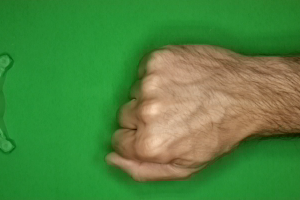

1292 , 144 , 1292 , 144
2622 , 292 , 2622 , 292
3988 , 444 , 3988 , 444


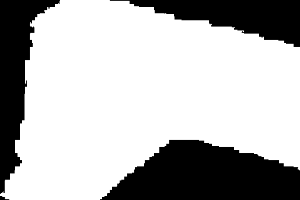

(3988, 200, 300, 1)


In [ ]:
image = cv.imread("rock/0bioBZYFCXqJIulm.png")
print(type(image))
print(image.shape)
cv2_imshow(image)
label = ["paper","rock","scissors"]
train_images,test_images,train_labels,test_labels = loadAll(label)
cv2_imshow(train_images[1990])
print(np.array(train_images).shape)

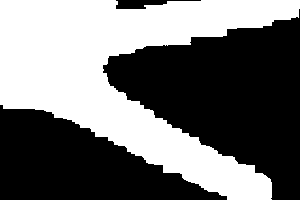

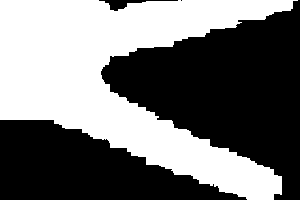

(200, 300)
(200, 300)


In [ ]:
#test image
numb=3001
cv2_imshow(train_images[numb])
cv2_imshow(train_images[numb-1])
print(train_images[numb].shape)
print(train_images[numb+1].shape)

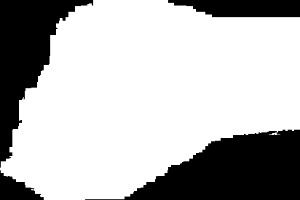

In [ ]:
#test to mak the image 200,300,1 for the ai i had wierd issues with the 200,300 on the first layer
from numpy import newaxis
image=cv2.resize(get_skin_regions_from_image(cv.imread("rock/0bioBZYFCXqJIulm.png"))[0],(300,200))
image=image[:,:,newaxis]
cv2_imshow(image)

In [ ]:
train_images,train_labels= shuffle(train_images,train_labels)
test_images,test_labels= shuffle(test_images,test_labels)

In [ ]:
train_images=np.array(train_images)
test_images=np.array(test_images)
train_labels=np.array(train_labels)
test_labels=np.array(test_labels)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lebal_encoder = LabelEncoder()
train_labels=lebal_encoder.fit_transform(train_labels)
test_labels=lebal_encoder.fit_transform(test_labels)
train_labels.astype(np.float32)
test_labels.astype(np.float32)
train_images.astype(np.float32)
test_images.astype(np.float32)

print(np.unique(train_labels))
print(np.unique(test_labels))
print(lebal_encoder.inverse_transform([0,1,2]))

[0 1 2]
[0 1 2]
['paper' 'rock' 'scissors']


In [ ]:
print("train_images",train_images.shape)
print("train_labels",train_labels.shape)
print("test_images",test_images.shape)
print("test_labels",test_labels.shape)

train_images (3988, 200, 300, 1)
train_labels (3988,)
test_images (444, 200, 300, 1)
test_labels (444,)


In [ ]:
#image  generator nem sikeült és nélküle is müködött
"""datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=20,
                             zoom_range=0.2,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range=0.1,
                             fill_mode="nearest")

testgen = ImageDataGenerator()

datagen.fit(X_train)
testgen.fit(X_test)

y_train = np.eye(nb)[y_train]
y_test = np.eye(nb)[y_test]
"""

In [ ]:
#test
'''from numpy import newaxis
print(train_images.shape)
train_images_test=train_images[:,:, :, newaxis]
train_labels_test=train_labels[:,:, :, newaxis]
test_images_test=test_images[:,:, :, newaxis]
test_labels_test=test_labels[:,:, :, newaxis]'''

'from numpy import newaxis\nprint(train_images.shape)\ntrain_images_test=train_images[:,:, :, newaxis]\ntrain_labels_test=train_labels[:,:, :, newaxis]\ntest_images_test=test_images[:,:, :, newaxis]\ntest_labels_test=test_labels[:,:, :, newaxis]'

##model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(200,300,1), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

In [ ]:

model.compile(optimizer='adam',
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              #loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images,
                    train_labels,
                    batch_size=64,
                    epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
63/63 [==============================] - 291s 5s/step - loss: 3.4989 - accuracy: 0.7914 - val_loss: 0.1888 - val_accuracy: 0.9369
Epoch 2/5
63/63 [==============================] - 285s 4s/step - loss: 0.0950 - accuracy: 0.9714 - val_loss: 0.1513 - val_accuracy: 0.9527
Epoch 3/5
63/63 [==============================] - 289s 5s/step - loss: 0.0405 - accuracy: 0.9857 - val_loss: 0.1770 - val_accuracy: 0.9572
Epoch 4/5
63/63 [==============================] - 282s 4s/step - loss: 0.0140 - accuracy: 0.9957 - val_loss: 0.2101 - val_accuracy: 0.9550
Epoch 5/5
63/63 [==============================] - 280s 4s/step - loss: 0.0071 - accuracy: 0.9977 - val_loss: 0.2078 - val_accuracy: 0.9550


14/14 - 9s - loss: 0.2078 - accuracy: 0.9550


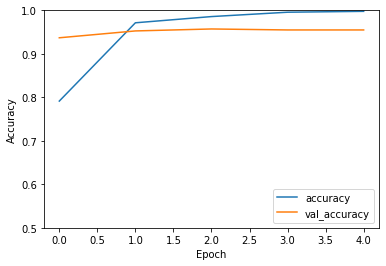

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.954954981803894


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/rock-paper-scissors/save/')

In [ ]:
%ls

paper/  rock/  save/  scissors/


In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/rock-paper-scissors/save/')
new_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 198, 298, 32)      320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 99, 149, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 97, 147, 32)       9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 48, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 46, 71, 32)        9248      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 23, 35, 32)      

In [ ]:
test_loss, test_acc = new_model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

14/14 - 9s - loss: 0.2078 - accuracy: 0.9550 - 9s/epoch - 647ms/step
0.954954981803894


# Test without training and minimal inport

In [ ]:
import cv2 as cv
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import  shuffle
from sklearn.model_selection import train_test_split
#
'''
def load(dir):
  folder_files = os.listdir(dir)
  resx,resy = [],[]
  for file in folder_files:
    resx.append(sat(cv.imread(os.path.join(dir, file))))
    resy.append(dir)
  x_train,x_test,y_train,y_test=train_test_split(resx,resy,test_size=0.1,random_state=9)
  return x_train,x_test,y_train,y_test


def loadAll(labels):
  x_train,x_test,y_train,y_test=[],[],[],[]
  for label in labels:
    x_train_loaded,x_test_loaded,y_train_loaded,y_test_loaded = load(label)
    x_train+=x_train_loaded
    x_test+=x_test_loaded
    y_train+=y_train_loaded
    y_test+=y_test_loaded
  return x_train,x_test,y_train,y_test


def sat(image):
  image = cv.resize(image,(300,200))
  min_YCrCb = np.array([0,133,77],np.uint8)
  max_YCrCb = np.array([235,173,127],np.uint8)
  imageHSV = cv.cvtColor(image, cv.COLOR_BGR2HSV)
  HSVmask = cv.inRange(imageHSV, (0, 15, 0), (17,170,255)) 
  imageYCrCb = cv.cvtColor(image,cv.COLOR_BGR2YCR_CB)
  skinRegionYCrCb = cv.inRange(imageYCrCb,min_YCrCb,max_YCrCb)
  bitmaskboth =cv.bitwise_and(skinRegionYCrCb,HSVmask)
  skinYCrCb = cv.bitwise_and(image, image, mask = bitmaskboth)
  return skinYCrCb

%cd drive/MyDrive/Colab Notebooks/rock-paper-scissors
'''
label = ["paper","rock","scissors"]
train_images,test_images,train_labels,test_labels = loadAll(label)

train_images,train_labels= shuffle(train_images,train_labels)
test_images,test_labels= shuffle(test_images,test_labels)

train_images=np.array(train_images)
test_images=np.array(test_images)
train_labels=np.array(train_labels)
test_labels=np.array(test_labels)

lebal_encoder = LabelEncoder()
train_labels=lebal_encoder.fit_transform(train_labels)
test_labels=lebal_encoder.fit_transform(test_labels)
train_labels.astype(np.float32)
test_labels.astype(np.float32)
train_images.astype(np.float32)
test_images.astype(np.float32)
uniq=np.unique(train_labels)
lables_map=lebal_encoder.inverse_transform(uniq)

1292 , 144 , 1292 , 144
2622 , 292 , 2622 , 292
3988 , 444 , 3988 , 444


In [ ]:
lables_map

array(['paper', 'rock', 'scissors'], dtype='<U8')

In [ ]:
test_number=12

In [ ]:
from tensorflow.keras.models import load_model
#import tensorflow as tf
#import keras

new_model = load_model('/content/drive/MyDrive/Colab Notebooks/rock-paper-scissors/save/')
test_loss, test_acc = new_model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)
prediction = new_model.predict(test_images[test_number:test_number+1])

print("prediction shape:", prediction.shape)
print("prediction:",prediction)

14/14 - 8s - loss: 0.0279 - accuracy: 0.9910 - 8s/epoch - 558ms/step
0.9909909963607788
1/1 [==============================] - 0s 161ms/step
prediction shape: (1, 3)
prediction: [[1.6347168e-09 4.0854282e-08 1.0000000e+00]]


In [ ]:
for i in range(3):
  print(lables_map[i],prediction[0][i])

paper 1.6347168e-09
rock 4.085428e-08
scissors 1.0


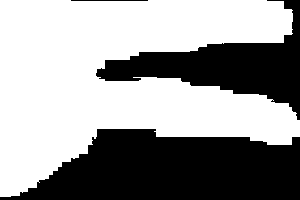

(1, 200, 300, 1)

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(test_images[test_number:test_number+1][0])
test_images[test_number:test_number+1].shape

# a fejlettebb bör érzékelövel


In [ ]:
def _get_skin_likeliness(img: np.ndarray, target_red, target_blue, max_tol_red, max_tol_blue):
    # Az egyes csatornákat szétszedjük, floatként tároljuk őket, hogy 255 fölé mehesüsnk
    b, g, r = cv2.split(img)
    r, g, b = r.astype(np.float64), g.astype(np.float64), b.astype(np.float64)
    # Leosztjuk a szinértékeket, hogy ne befolyásolja a fényerő a detektálást
    # A zöld szinre nincs szükség, mert megkapható a másik kettőből
    rgb = r + g + b
    b = cv2.divide(b, rgb)
    r = cv2.divide(r, rgb)
    # Meghatározzuk a távolságot a kivánt szintől úgy,
    # hogy a beállitott rd és bd értékek határozzák meg a maximum távolságot,
    # amit figyelembe veszünk
    b = np.clip(cv2.absdiff(b * 255, target_blue) * 255 / max_tol_blue, 0.0, 255.0)
    r = np.clip(cv2.absdiff(r * 255, target_red) * 255 / max_tol_red, 0.0, 255.0)
    # A legnagyobb távolságot nézzük a két szin közül, ez adta a legjobb eredményt
    return np.maximum(r, b).astype(np.uint8)


def _get_skin_regions(img: np.ndarray):
    likeliness = _get_skin_likeliness(img, 160, 40, 70, 36)
    binary = np.array(likeliness)
    # Az optimális küszöbértéket meghatározza automatikusan,
    # az ezzel kapott képet invertáljuk, hogy a fehér részek jelentsék a kezeket
    cv2.threshold(likeliness, 1, 255, cv2.THRESH_TRIANGLE, binary)
    cv2.bitwise_not(binary, binary)
    # Összefüggő területeket keresünk
    contours, hier = cv2.findContours(binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    new_binary = np.zeros(binary.shape)
    hands = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if 10000 < area:  # Ha elég nagy a területe, akkor kirajzoljuk
            (x, y, w, h) = cv2.boundingRect(contour)
            cv2.drawContours(new_binary, [contour], 0, 255, -1)
            hands.append(new_binary[y:y+h, x:x+w])
    return hands


def get_skin_regions(path: str):
    img = cv2.imread(path)
    img = cv2.resize(img, (640, np.size(img, 0) * 640 // np.size(img, 1)), None, 0, 0, cv2.INTER_AREA)
    return _get_skin_regions(img)
    
def get_skin_regions_from_image(img):
    img = cv2.resize(img, (640, np.size(img, 0) * 640 // np.size(img, 1)), None, 0, 0, cv2.INTER_AREA)
    return _get_skin_regions(img)

# api for my team v0.1

In [ ]:
from tensorflow.keras.models import load_model

def initCNN():
  new_model = load_model('/content/drive/MyDrive/Colab Notebooks/rock-paper-scissors/save/')
  return new_model

In [ ]:
import cv2
import numpy as np
def test_image_CNN(model,image):
  img = cv2.resize(image,(300,200))
  (h, w) = img.shape[:2]
  test = np.array([img,
                   cv2.warpAffine(img, cv2.getRotationMatrix2D((w / 2, h / 2), 90, 1.0), (w, h)),
                   cv2.warpAffine(img, cv2.getRotationMatrix2D((w / 2, h / 2), 180, 1.0), (w, h)),
                   cv2.warpAffine(img, cv2.getRotationMatrix2D((w / 2, h / 2), 270, 1.0), (w, h))])
  prediction = model.predict(test)
  result = np.where(prediction == np.amax(prediction))
  print(result[0][0],result[1][0])
  test_labels=['paper', 'rock', 'scissors']
  print(test_labels[result[1][0]])


#image path
#paper/0Og76sl5CJhbxWWx.png
#rock/00nKV8oHuTGi20gq.png
#scissors/0657zSfiTYzP2jrl.png

#cv2_imshow(get_skin_regions("/content/drive/MyDrive/Colab Notebooks/rock-paper-scissors/scissors/1Io5Ksm3bqy87EAU.png")[0])
print(get_skin_regions("/content/drive/MyDrive/Colab Notebooks/rock-paper-scissors/scissors/1Io5Ksm3bqy87EAU.png")[0].shape)
#
#new_m=initCNN()
#test_image_CNN(new_m,skinYCrCb)
#test_image_CNN(new_m,test_images[test_number:test_number+1][0])

(230, 411)


In [ ]:
import numpy
test_array = numpy.array([[3.9919025e-01, 6.0012984e-01, 6.7989604e-04],
 [1.3944872e-04, 9.8986053e-01, 2.1748503e-08],
 [1.3562694e-02, 9.8641962e-01, 1.7739481e-05],
 [6.6381227e-03, 9.9334258e-01, 1.9298059e-05]])
result = numpy.where(test_array == numpy.amax(test_array))
print(result[0][0],result[1][0])
test_labels=['paper', 'rock', 'scissors']
print(test_labels[result[1][0]])

3 1
rock


# last test

In [ ]:
from google.colab.patches import cv2_imshow ##kép kiiratás a colabban

In [ ]:
class CNN:
  def __init__(self,pathToSave,threshold=0.8,labels=['paper', 'rock', 'scissors']):
    self.model = load_model(pathToSave)
    self.threshold=threshold
    self.labels=labels
  def getThreshold(self):
    return self.threshold
  def getLabels(self):
    return self.labels
  def setLabels(self,l):
    self.labels=l
  def setThreshold(self,t):
    self.threshold=t
  def imageClassification(self,image):
    img = cv2.resize(image,(300,200))
    (h, w) = img.shape[:2]
    test = np.array([img,
                    #cv2.warpAffine(img, cv2.getRotationMatrix2D((w / 2, h / 2), 90, 1.0), (w, h)),
                    cv2.warpAffine(img, cv2.getRotationMatrix2D((w / 2, h / 2), 180, 1.0), (w, h))])#,
                    #cv2.warpAffine(img, cv2.getRotationMatrix2D((w / 2, h / 2), 270, 1.0), (w, h))])
    #cv2_imshow(img)
    #cv2_imshow(cv2.warpAffine(img, cv2.getRotationMatrix2D((w / 2, h / 2), 90, 1.0), (w, h)))
    #cv2_imshow(cv2.warpAffine(img, cv2.getRotationMatrix2D((w / 2, h / 2), 180, 1.0), (w, h)))
    #cv2_imshow(cv2.warpAffine(img, cv2.getRotationMatrix2D((w / 2, h / 2), 270, 1.0), (w, h)))
    prediction = self.model.predict(test)
    result = np.where(prediction == np.amax(prediction))
    #print(result[0][0],result[1][0])
    #print(np.amax(prediction))
    #print(self.labels[result[1][0]] if np.amax(prediction) >= self.threshold else "nem ismerem fel")
    if np.amax(prediction) >= self.threshold:
      return self.labels[result[1][0]]
    else:
      raise ValueError("I dont know :( the cnn output too small")


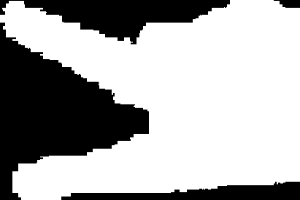

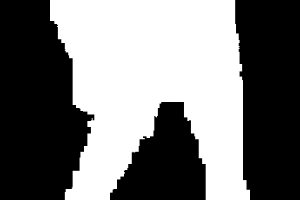

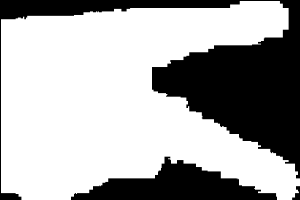

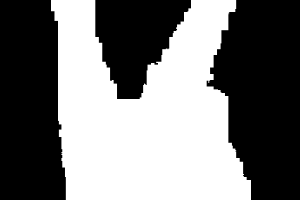

1/1 [==============================] - 0s 157ms/step
scissors


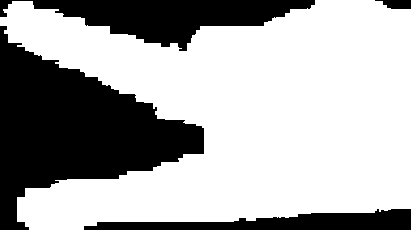

In [ ]:
my_cnn=CNN('/content/drive/MyDrive/Colab Notebooks/rock-paper-scissors/save/')
#my_cnn.setThreshold(2)

print(my_cnn.imageClassification(get_skin_regions_from_image(cv2.imread("/content/drive/MyDrive/Colab Notebooks/rock-paper-scissors/scissors/1Io5Ksm3bqy87EAU.png"))[0]))
cv2_imshow(get_skin_regions_from_image(cv2.imread("/content/drive/MyDrive/Colab Notebooks/rock-paper-scissors/scissors/1Io5Ksm3bqy87EAU.png"))[0])